# Machine Learning Project - Kickstarter Data Set
## EDA Notebook
*Contributor: Max Langer, René Ebrecht, Jens Reich*

This is the very first project where we build a machine learning model from scratch based on an unknown dataset.
The dataset includes data from Kickstarter projects from the years 2009 to 2019.

Our goal is to help our (fictional) stackholder, PPC Consultants with a model that can predict whether a Kickstarter project will be successful or not. 
PPC Consultants advises potential project creators (PPCs) with their projects to get them off the ground as successfully as possible.
Therefore, the value of our data product (the predictive model) is to show opportunities, save time, and in the end make money for both PPC consultants and PPCs.

In [117]:
# Import the organization modules
import pandas as pd
import numpy as np
import datetime
# Import module to ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Import the plot modules
import matplotlib.pyplot as plt
import seaborn as sns
# Import own scripts
from scripts.data_cleaning import (
    read_all_csvs, 
    clean_data,
    convert_to_datetime,
    get_year_month_day,
    clean_target,
    create_csv
    )

In [118]:
# Create data frame from all single CSV files
df = read_all_csvs()

In [119]:
# Clean the data
df_clean = clean_data(df)

In [120]:
# Get a look at the data frame
df_clean.head()

,goal,state,days_launched_till_changed,days_prelaunch,days_total,project_name_len,creator_name_len,blurb_len,country_AT,country_AU,...,category_sub_wearables,category_sub_weaving,category_sub_web,category_sub_webcomics,category_sub_webseries,category_sub_woodworking,category_sub_workshops,category_sub_world music,category_sub_young adult,category_sub_zines
0,200.0,successful,45,4,49,21,6,134,0,0,...,0,0,0,0,0,0,0,0,0,0
1,400.0,successful,20,5,25,31,9,55,0,0,...,0,0,0,0,0,0,0,0,0,0
2,27224.0,successful,30,9,39,60,13,135,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40000.0,successful,42,3,45,25,3,75,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000.0,failed,30,2,32,30,11,133,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
sns.set_theme(context='notebook', style='darkgrid')
# For the image quality of the graphic. 
sns.set(rc={"figure.dpi":300})
# For the size of the graphics
sns.set(rc = {"figure.figsize":(6,3)})

Let us start the EDA by looking at our target variable.

In [122]:
# Remove the duplicates
df.drop_duplicates(subset='id', inplace=True)
# Drop all columns with more than 50% of the observations missing
df = df[[column for column in df if df[column].count() / len(df) >= 0.5]]
# Convert the time columns to datetime types
df = convert_to_datetime(df, ['created_at', 'state_changed_at', 'deadline', 'launched_at'])
# Clean the target variable
df = clean_target(df)

In [114]:
# Get the years, months and days as separate columns
df_year_split = get_year_month_day(df, ['created_at', 'state_changed_at', 'deadline', 'launched_at'])

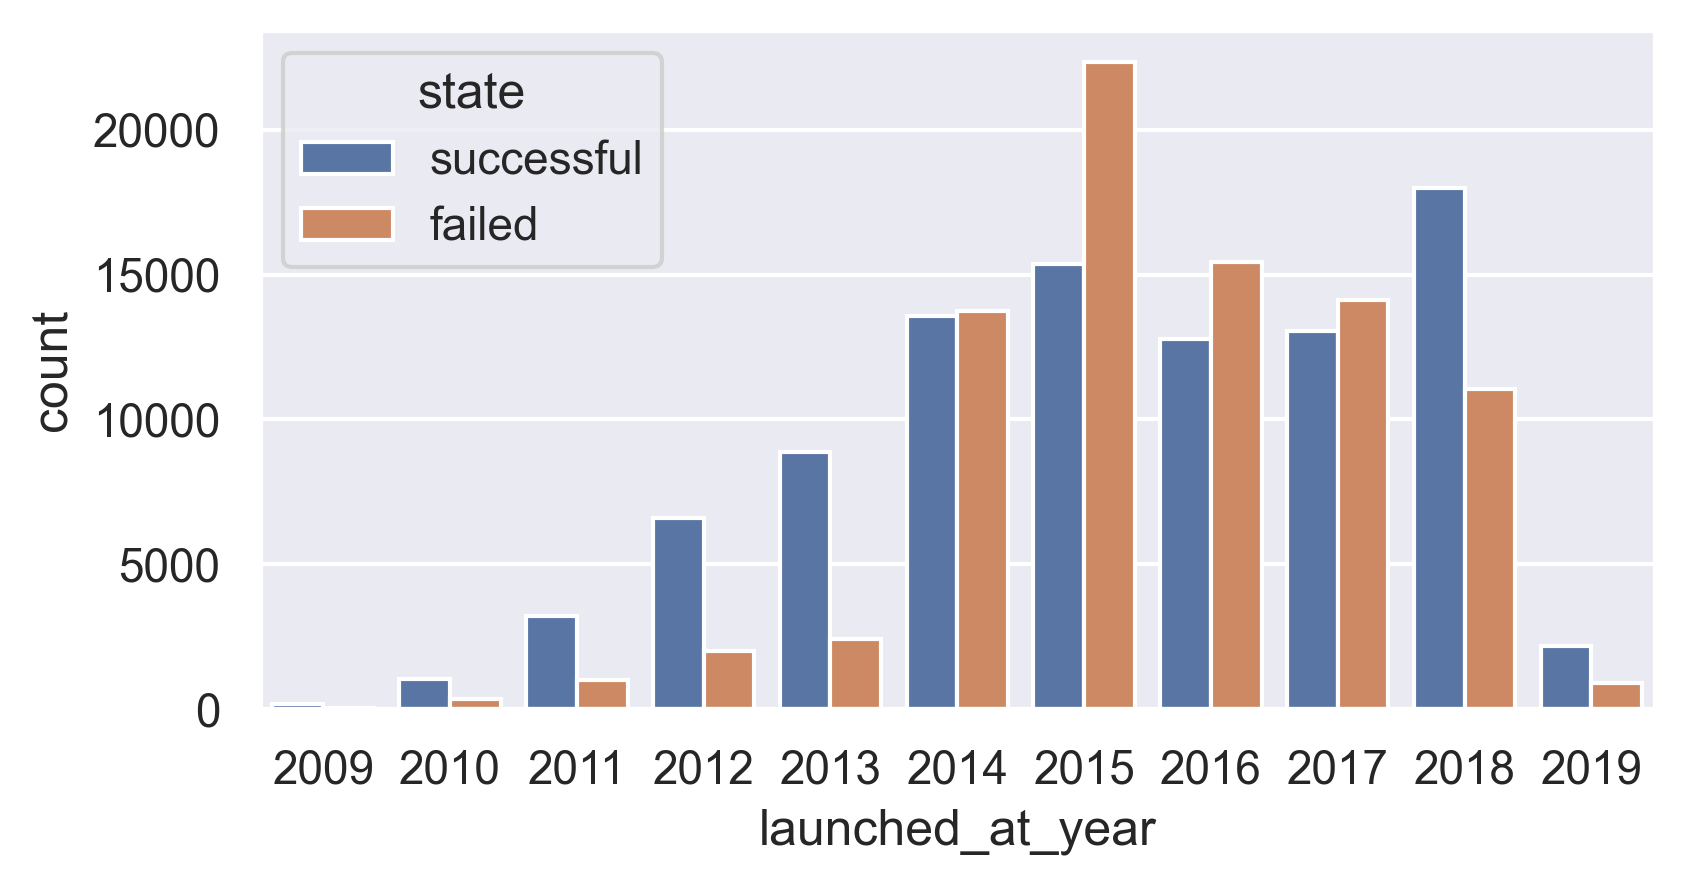

In [115]:
# Plot the amount of successful and failed projects over the years.
sns.countplot(data=df_year_split, x='launched_at_year', hue='state');

In [93]:
df.groupby(['launched_at_year', 'state']).count()

backers_count  blurb  category  \
launched_at_year state                                        
2009             failed                 51     51        51   
                 successful            182    182       182   
2010             failed                359    359       359   
                 successful           1056   1056      1056   
2011             failed               1010   1010      1010   
                 successful           3220   3220      3220   
2012             failed               2016   2015      2016   
                 successful           6584   6584      6584   
2013             failed               2418   2418      2418   
                 successful           8861   8861      8861   
2014             failed              13743  13742     13743   
                 successful          13562  13562     13562   
2015             failed              22329  22326     22329   
                 successful          15352  15352     15352   
2016             failed              15432  15431     15432   
                 successful          12768  12768     12768   
2017             failed              14113  14111     14113   
                 successful          13038  13038     13038   
2018             failed              11058  11058     11058   
                 successful          17974  17974     17974   
2019             failed                918    918       918   
                 successful           2181   2181      2181   

                             converted_pledged_amount  country  creator  \
launched_at_year state                                                    
2009             failed                            51       51       51   
                 successful                       182      182      182   
2010             failed                           359      359      359   
                 successful                      1056     1056     1056   
2011             failed                          1010     1010     1010   
                 successful                      3220     3220     3220   
2012             failed                          2016     2016     2016   
                 successful                      6584     6584     6584   
2013             failed                          2418     2418     2418   
                 successful                      8861     8861     8861   
2014             failed                         13743    13743    13743   
                 successful                     13562    13562    13562   
2015             failed                         22329    22329    22329   
                 successful                     15352    15352    15352   
2016             failed                         15432    15432    15432   
                 successful                     12768    12768    12768   
2017             failed                         14113    14113    14113   
                 successful                     13038    13038    13038   
2018             failed                         11058    11058    11058   
                 successful                     17974    17974    17974   
2019             failed                           918      918      918   
                 successful                      2181     2181     2181   

                             currency  currency_symbol  \
launched_at_year state                                   
2009             failed            51               51   
                 successful       182              182   
2010             failed           359              359   
                 successful      1056             1056   
2011             failed          1010             1010   
                 successful      3220             3220   
2012             failed          2016             2016   
                 successful      6584             6584   
2013             failed          2418             2418   
                 successful      8861             8861   
2014             fa

In [139]:
df.groupby('launched_at_year', 'state').count()
df.query('prop_success = ')
sns.countplot(data=df, x='launched_at_year',);

ValueError: No axis named state for object type DataFrame

Now we can have a look at the project amount over the 10 year span the data set covers.

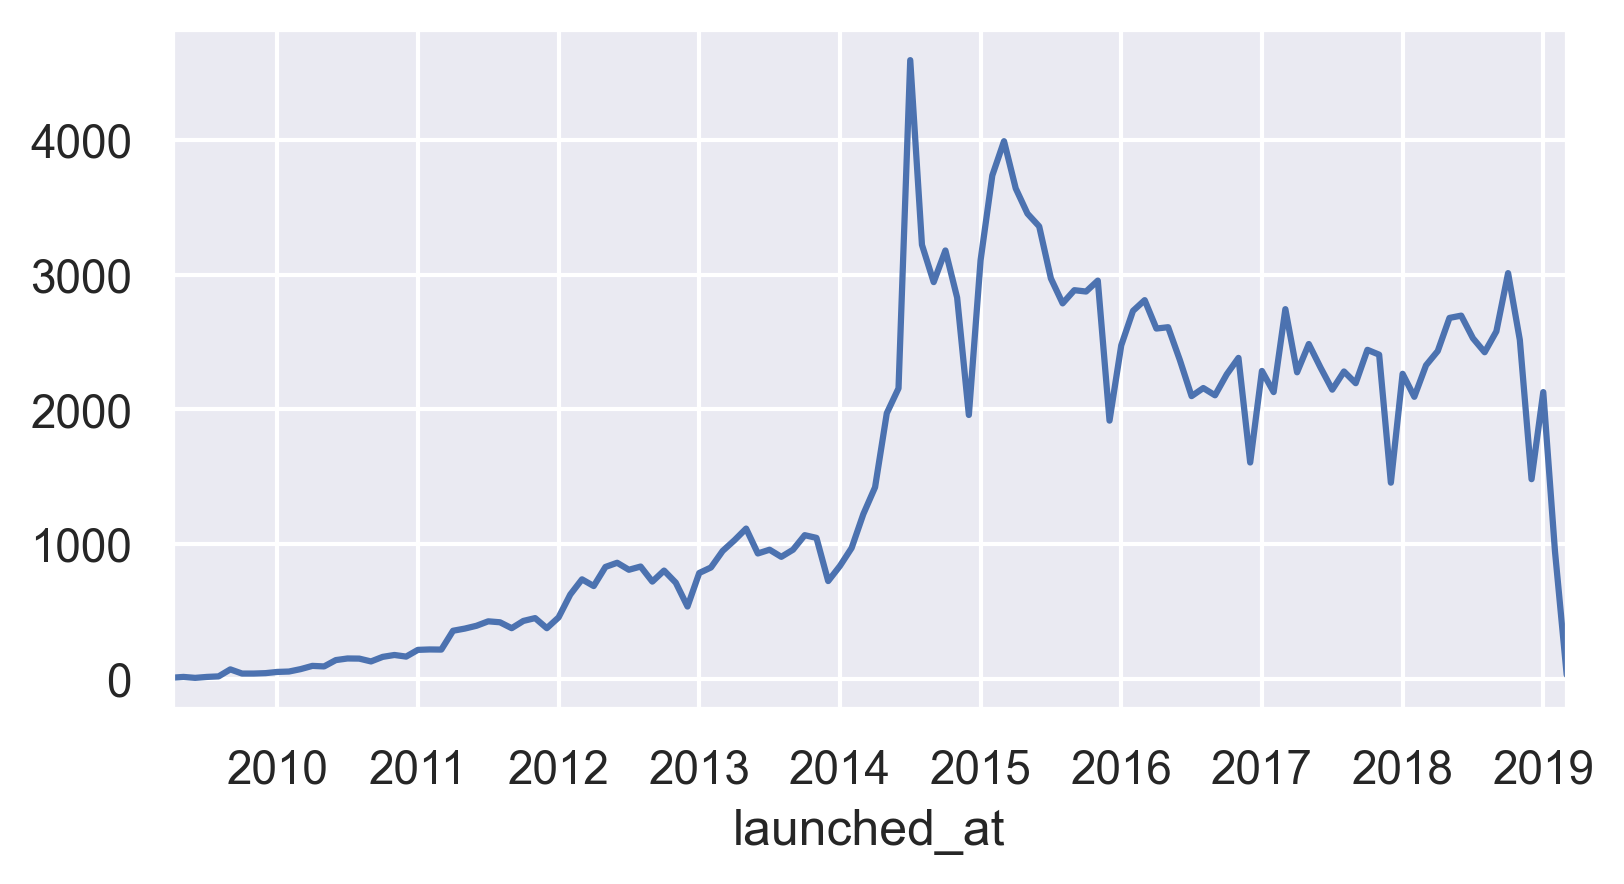

In [138]:
# .set_index sets the launched_at as index
# .resample aggregates time series data in this case by month (M), Y would be year
# https://towardsdatascience.com/using-the-pandas-resample-function-a231144194c4
df.set_index('launched_at')['category'].resample('M').count().plot();